In [1]:
from pathlib import Path
import sys

PROJECT_ROOT = Path.cwd()
# Locate repo root so imports from src work even if notebook moves
while PROJECT_ROOT != PROJECT_ROOT.parent and not (PROJECT_ROOT / 'src').exists():
    PROJECT_ROOT = PROJECT_ROOT.parent

if not (PROJECT_ROOT / 'src').exists():
    raise RuntimeError("Could not locate 'src' directory relative to this notebook")

if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))



──────────────────────────────
Optimal weight vector found for 'arrivals_sinusoidal_rand' | cost='sin_randomized'
Objective value: 745.2144
w* (rounded): [0.8227 0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.1773 0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.    ]
Sum(w*): 1.0000
──────────────────────────────


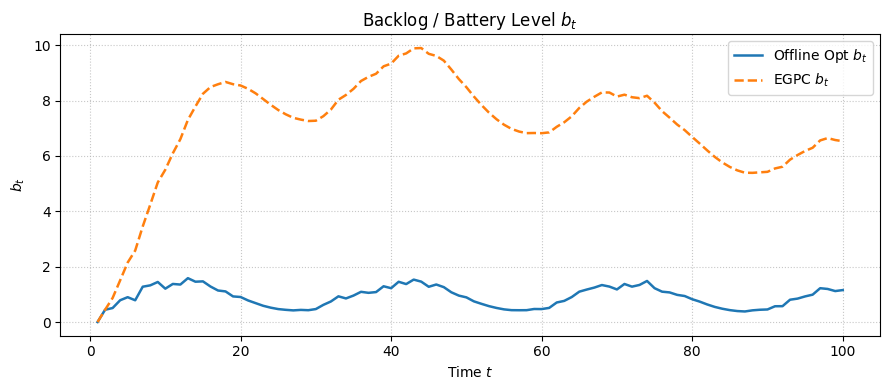

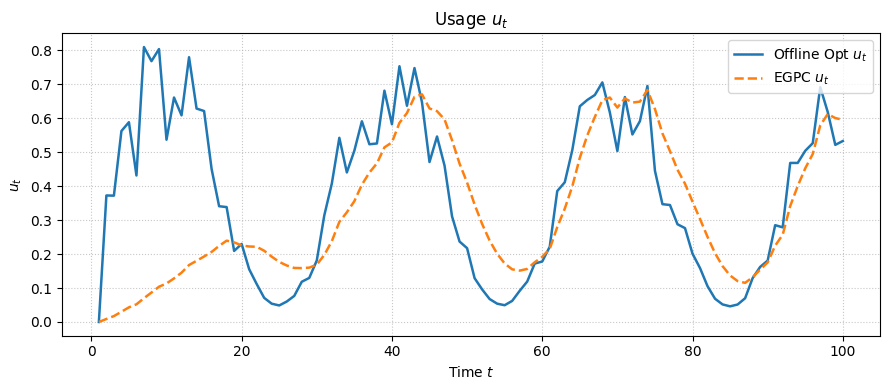

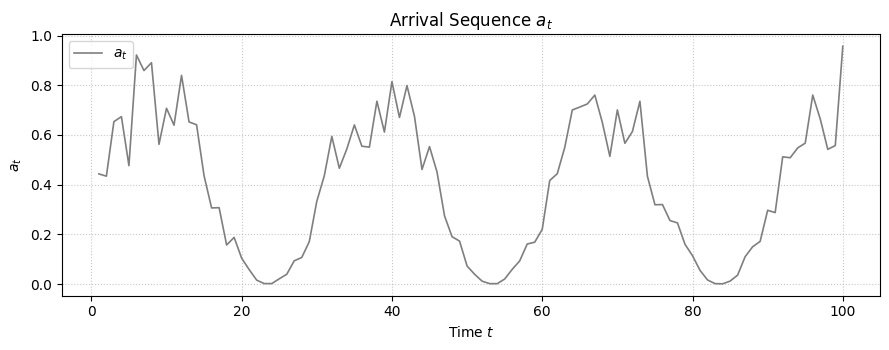

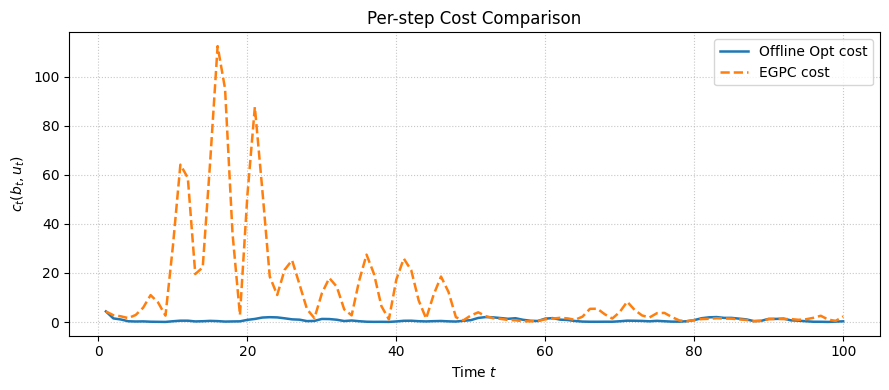


──────────────────────────────
Offline Opt     Total cost: 745.2144
EGPC            Total cost: 2070.0805
──────────────────────────────


{'total_costs': {'Offline Opt': 745.2144046266582, 'EGPC': 2070.080484404274},
 'pairwise_abs_diff': {'Offline Opt vs EGPC': {'b_diff': 6.154035388437016,
   'u_diff': 0.15657353221375797,
   'cost_diff': 11.16903890437851}},
 'total_cost_1': 745.2144046266582,
 'total_cost_2': 2070.080484404274,
 'b_diff': 6.154035388437016,
 'u_diff': 0.15657353221375797,
 'cost_diff': 11.16903890437851,
 'plot_window': {'start': 0, 'end': 100}}

In [2]:
from src.offline_opt import solve_optimal_w
from src.simulate_storage_dynamics import simulate_storage_dynamics
from src.egpc import run_egpc
from src.plots import compare_controllers

import numpy as np


# Example usage
T = 1000            # horizon length
H = 100             # feature dimension for w* and EGPC
kappa = 0.01         # decay parameter for feature construction

a_mode = 'arrivals_sinusoidal_rand'   # arrivals key from ARRIVAL_FUNCTIONS
cost_key = 'sin_randomized'  # cost key from COST_FUNCTIONS

L_u = 2.6
L_b = 5


L = L_u + L_b/kappa




opt_data = solve_optimal_w(a_mode=a_mode, cost_key=cost_key, H=H, T=T)
opt_sim = simulate_storage_dynamics(
    opt_data["Phi"],
    opt_data["Psi"],
    opt_data["a"],
    opt_data["w_star"],
    cost_fn=opt_data["cost_fn"],
    cost_kwargs=opt_data["cost_kwargs"],
)


egpc_result = run_egpc(
    a_mode=a_mode,
    cost_key=cost_key,
    eta = np.sqrt(np.log(H)/T/(1/2 + 1/kappa)) / L*100,
    H=H,
    T=T,
    kappa = kappa,
    cost_kwargs=opt_data["cost_kwargs"],
)

compare_controllers(opt_sim, "Offline Opt", egpc_result, "EGPC", a=opt_data["a"], plot_arrival_separately=True,
plot_start=0,
plot_end=100)
